<a href="https://colab.research.google.com/github/UDDSI/COVID19hackathon/blob/master/projects/SupportTrack/Equitable_Access_to_Digital_Healthcare_and_Education/allmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# author: Federica Bianco (@fedhere)

Notebook with examples of how to read and plot cenusus data in python



In [1]:
!pip install census

In [2]:
!pip install us


     |████████████████████████████████| 133kB 4.0MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11927 sha256=e33be233ca8770c1d7196b0acce92656acd4d65c1fc868960f900c9299ee6d1d
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74747 sha256=3002b1017f75b924172f59e76bff5ce3e9cdda95c483d62e79939149b0027b20
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [3]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 271kB/s 
     |████████████████████████████████| 10.9MB 40.4MB/s 


In [4]:
!pip install CensusData
!pip install shapely

     |████████████████████████████████| 23.2MB 1.5MB/s 
  Created wheel for CensusData: filename=CensusData-1.7-cp36-none-any.whl size=24706084 sha256=aa6e2875a681d415eb552349117b250d19c4cb3624b010d87f61fe0776411370
  Stored in directory: /root/.cache/pip/wheels/e8/9e/f9/8d0b054be9981c6f675630de9f32ce59620f8b515c13542a4c
Successfully built CensusData


In [5]:
import pandas as pd
import numpy as np
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [9]:
pwd

'/content/gdrive/My Drive'

In [10]:
!mkdir UDCOVIDhack

mkdir: cannot create directory ‘UDCOVIDhack’: File exists


In [11]:
cd UDCOVIDhack

/content/gdrive/My Drive/UDCOVIDhack



you can use the geopandas function plot. 


# example of reading broadband access data at the county level.

## read about the census API

In [0]:
# modules to get census data
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)


In [14]:
censusdata.search('acs1', 2018,'concept', 'internet')


[('B28002_001E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total'),
 ('B28002_002E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription'),
 ('B28002_003E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Dial-up with no other type of Internet subscription'),
 ('B28002_004E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_005E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Cellular data plan'),
 ('B28002_006E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription'),
 ('B28002_007E',
  'PRESENCE AND TYPES OF INTERNET SU

pick the estmiated total and the number of households and the number of households

'B28003_001E',
  'PRESENCE OF A COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD',
  'Estimate!!Total'

and 

'B28003_004E',
  'PRESENCE OF A COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD',
  'Estimate!!Total!!Has a computer!!With a broadband Internet subscription'


In [15]:

censusdata.printtable(censusdata.censustable('acs1', 2018, 'B28003')), 


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B28003_001E  | PRESENCE OF A COMPUTER AND TYP | !! Estimate Total                                        | int  
B28003_002E  | PRESENCE OF A COMPUTER AND TYP | !! !! Estimate Total Has a computer                      | int  
B28003_003E  | PRESENCE OF A COMPUTER AND TYP | !! !! !! Estimate Total Has a computer With dial-up Inte | int  
B28003_004E  | PRESENCE OF A COMPUTER AND TYP | !! !! !! Estimate Total Has a computer With a broadband  | int  
B28003_005E  | PRESENCE OF A COMPUTER AND TYP | !! !! !! Estimate Total Has a computer Without an Intern | int  
B28003_006E  | PRESENCE OF A COMPUTER AND TYP | !! !! Estimate Total No computer                         | int  
---------------------------------------------------------------------------------------------

(None,)

get the state code

In [16]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs1', 2018)


{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

get the data at county granularity. Tract granularity is not available for this data in this survey

In [17]:
households = censusdata.download('acs1', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B28003_001E"])
bbhouseholds = censusdata.download('acs1', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B28003_004E"])

bbhouseholds                                  

,B28003_004E
"New Castle County, Delaware: Summary level: 050, state:10> county:003",187641
"Sussex County, Delaware: Summary level: 050, state:10> county:005",77971
"Kent County, Delaware: Summary level: 050, state:10> county:001",57421


In [18]:
households16 = censusdata.download('acs1', 2016,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B28003_001E"])
bbhouseholds16 = censusdata.download('acs1', 2016,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B28003_004E"])

bbhouseholds16

,B28003_004E
"Kent County, Delaware: Summary level: 050, state:10> county:001",54208
"New Castle County, Delaware: Summary level: 050, state:10> county:003",171764
"Sussex County, Delaware: Summary level: 050, state:10> county:005",64515


In [19]:
bbDEcounty = bbhouseholds.merge(households, left_index=True, right_index=True)
bbDEcounty
bbDEcounty16 = bbhouseholds16.merge(households16, left_index=True, right_index=True)
bbDEcounty16

,B28003_004E,B28003_001E
"Kent County, Delaware: Summary level: 050, state:10> county:001",54208,64452
"New Castle County, Delaware: Summary level: 050, state:10> county:003",171764,203782
"Sussex County, Delaware: Summary level: 050, state:10> county:005",64515,82851


In [0]:
bbDEcounty["broadband_fraction"] = bbDEcounty.B28003_004E / bbDEcounty.B28003_001E
bbDEcounty16["broadband_fraction"] = bbDEcounty16.B28003_004E / bbDEcounty16.B28003_001E

In [21]:
# manipulate index to extract the county
bbDEcounty["county"] = bbDEcounty.index.astype(str).map(lambda x: x.split(":")[-1])
bbDEcounty
bbDEcounty16["county"] = bbDEcounty16.index.astype(str).map(lambda x: x.split(":")[-1])
bbDEcounty16

,B28003_004E,B28003_001E,broadband_fraction,county
"Kent County, Delaware: Summary level: 050, state:10> county:001",54208,64452,0.841060,001
"New Castle County, Delaware: Summary level: 050, state:10> county:003",171764,203782,0.842881,003
"Sussex County, Delaware: Summary level: 050, state:10> county:005",64515,82851,0.778687,005


In [22]:
# tract would be ideal
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip

--2020-05-12 21:27:54--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 23.192.94.146, 2600:1402:2000:39d::208c, 2600:1402:2000:38d::208c
Connecting to www2.census.gov (www2.census.gov)|23.192.94.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_10_tract.zip.3’

tl_2018_10_tract.zi     [               <=>  ] 997.34K   283KB/s    in 3.5s    

2020-05-12 21:27:59 (283 KB/s) - ‘tl_2018_10_tract.zip.3’ saved [1021272]



In [0]:
# getting the map
!wget https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip


In [0]:
!unzip tl_2018_us_county.zip
!unzip tl_2018_10_tract.zip

In [0]:
# module for mapping; if you are familiar with pandas this should be intuitive
import geopandas as gpd

In [24]:
gde = gpd.GeoDataFrame.from_file("tl_2018_10_tract.shp")
gde.shape

(218, 13)

In [25]:
gde = gde[gde.ALAND>0]
gde.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."


In [0]:
allDE = gde.merge(bbDEcounty, left_on="COUNTYFP", right_on="county")
allDE16 = gde.merge(bbDEcounty16, left_on="COUNTYFP", right_on="county")


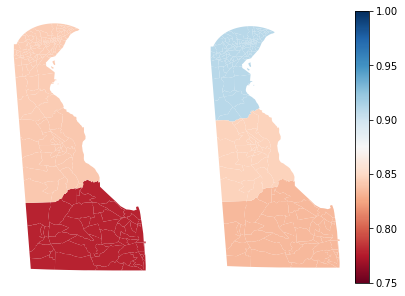

In [38]:
# map it all!
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(121)
allDE16.plot(column="broadband_fraction", #scheme='Quantiles',
            ax=ax, legend=False, vmin=0.75, vmax=1, cmap="RdBu")
ax.axis('off')
ax = fig.add_subplot(122)
allDE.plot(column="broadband_fraction", ax=ax, legend=True, vmin=0.75, vmax=1, cmap="RdBu");
ax.axis('off');


# alternative: use the API directly

#read in in the variables available. the info you need is in the 1year ACS data, we can get broadband at PUMA granularity levell


In [39]:
import requests
import json
import io
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
aff1y

{'variables': {'for': {'concept': 'Census API Geography Specification',
   'group': 'N/A',
   'label': "Census API FIPS 'for' clause",
   'limit': 0,
   'predicateOnly': True,
   'predicateType': 'fips-for'},
  'in': {'concept': 'Census API Geography Specification',
   'group': 'N/A',
   'label': "Census API FIPS 'in' clause",
   'limit': 0,
   'predicateOnly': True,
   'predicateType': 'fips-in'},
  'B24022_060E': {'attributes': 'B24022_060M,B24022_060EA',
   'group': 'B24022',
   'label': 'Estimate!!Total!!Female!!Service occupations!!Food preparation and serving related occupations',
   'limit': 0,
   'predicateType': 'int'},
  'B19001B_014E': {'attributes': 'B19001B_014M,B19001B_014EA',
   'group': 'B19001B',
   'label': 'Estimate!!Total!!$100,000 to $124,999',
   'limit': 0,
   'predicateType': 'int'},
  'C02014_002E': {'attributes': 'C02014_002M,C02014_002EA',
   'group': 'C02014',
   'label': 'Estimate!!Total!!American Indian tribes, specified',
   'limit': 0,
   'predicateType'

In [0]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))


In [41]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]


[('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription')]

In [42]:
#keyword for the number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [43]:
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [0]:
myAPIkey =  'xxx'#'



In [46]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:10&key=" + myAPIkey
resp = requests.request('GET', url).content
pumaBB16 = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
url = "https://api.census.gov/data/2018/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:10&key=" + myAPIkey
resp = requests.request('GET', url).content
pumaBB18 = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

#getting the first row of the table: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get="  + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPIkey
resp = requests.request('GET', url).content
pumaPP16 = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
url = "https://api.census.gov/data/2018/acs/acs1?get="  + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPIkey
resp = requests.request('GET', url).content
pumaPP18 = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB16.to_csv("DEBB2016.csv")
pumaBB18.to_csv("DEBB2018.csv")
pumaPP18.to_csv("DEPP2018.csv")
pumaPP16.to_csv("DEPP2016.csv")
pumaPP16, pumaBB16

(     B28002_001E  ... Unnamed: 4
 0          47005  ...        NaN
 1          37435  ...        NaN
 2          53507  ...        NaN
 3          39808  ...        NaN
 4          66902  ...        NaN
 ..           ...  ...        ...
 140        45191  ...        NaN
 141        42114  ...        NaN
 142        55953  ...        NaN
 143        58343  ...        NaN
 144        63963  ...        NaN
 
 [145 rows x 5 columns],    B28002_004E  ... Unnamed: 4
 0        29326  ...        NaN
 1        51714  ...        NaN
 2        47281  ...        NaN
 3        44998  ...        NaN
 4        54499  ...        NaN
 5        64782  ...        NaN
 
 [6 rows x 5 columns])

In [0]:
pumas = pumaBB18.merge(pumaBB16, on='public use microdata area').merge(pumaPP18, on='public use microdata area').merge(pumaPP16, on='public use microdata area')
pumas["BBfraction18"] = pumas.B28002_004E_x / pumas.B28002_001E_x
pumas["BBfraction16"] = pumas.B28002_004E_y / pumas.B28002_001E_y


more examples here https://github.com/fedhere/PUI2018_fb55/blob/master/HW7_fb55/geopandas_census_solution.ipynb

In [0]:
censusdata.search('acs1', 2018,'concept', 'age')


In [0]:
age_variables = censusdata.printtable(censusdata.censustable('acs1', 2018, 'B01001')), 


In [48]:
agebracketsM = []
for i in range(3,6):
  agebracketsM += ["age%d-%d"%((0+(i-3))*5, (1+(i-3))*5)]
agebracketsM += ["age15-17"]
agebracketsM += ["age18-19"]
agebracketsM += ["age20-20"]
agebracketsM += ["age21-21"]
agebracketsM += ["age22-24"]

for i in range(11,26):
  agebracketsM += ["age%d-%d"%((0+(i-11))*5, (1+(i-11))*5)]


agebracketsF = []
for i in range(27,29):
  print(i)
  agebracketsF += ["age%d-%d"%((0+(i-27))*5+25, (1+(i-27))*5+25)]

agebracketsF += ["age15-17"]
agebracketsF += ["age18-19"]
agebracketsF += ["age20-20"]
agebracketsF += ["age21-21"]
agebracketsF += ["age22-24"]
for i in range(34,50):
  print(i)
  agebracketsF += ["age%d-%d"%((0+(i-34))*5+25, (1+(i-34))*5+25)]

agebracketsF

27
28
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


['age25-30',
 'age30-35',
 'age15-17',
 'age18-19',
 'age20-20',
 'age21-21',
 'age22-24',
 'age25-30',
 'age30-35',
 'age35-40',
 'age40-45',
 'age45-50',
 'age50-55',
 'age55-60',
 'age60-65',
 'age65-70',
 'age70-75',
 'age75-80',
 'age80-85',
 'age85-90',
 'age90-95',
 'age95-100',
 'age100-105']

In [49]:
df = []
for i in range(3,26):
  df.append(censusdata.download('acs1', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B01001_%03dE"%3]).rename({"B01001_%03dE"%3:agebracketsM[i-3]}, axis=1))
for i in range(27,50):
  df.append(censusdata.download('acs1', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B01001_%03dE"%3]).rename({"B01001_%03dE"%3:agebracketsF[i-27]}, axis=1))     
pd.concat(df)                     

,age0-5,age5-10,age10-15,age15-17,age18-19,age20-20,age21-21,age22-24,age15-20,age20-25,age25-30,age30-35,age35-40,age40-45,age45-50,age50-55,age55-60,age60-65,age65-70,age70-75,age75-80,age80-85,age85-90,age90-95,age95-100,age100-105
"New Castle County, Delaware: Summary level: 050, state:10> county:003",16378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Sussex County, Delaware: Summary level: 050, state:10> county:005",5426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Kent County, Delaware: Summary level: 050, state:10> county:001",5807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"New Castle County, Delaware: Summary level: 050, state:10> county:003",NaN,16378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Sussex County, Delaware: Summary level: 050, state:10> county:005",NaN,5426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sussex County, Delaware: Summary level: 050, state:10> county:005",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5426.0,NaN
"Kent County, Delaware: Summary level: 050, state:10> county:001",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5807.0,NaN
"New Castle County, Delaware: Summary level: 050, state:10> county:003",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16378.0
"Sussex County, Delaware: Summary level: 050, state:10> county:005",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5426.0


In [50]:
!ls DE_Tracts/

DE_Tracts.cpg  DE_Tracts.prj  DE_Tracts.sbx  DE_Tracts.shx
DE_Tracts.dbf  DE_Tracts.sbn  DE_Tracts.shp


In [0]:
gde2 = gpd.GeoDataFrame.from_file("DE_Tracts/DE_Tracts.shp")


In [52]:
gde2.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

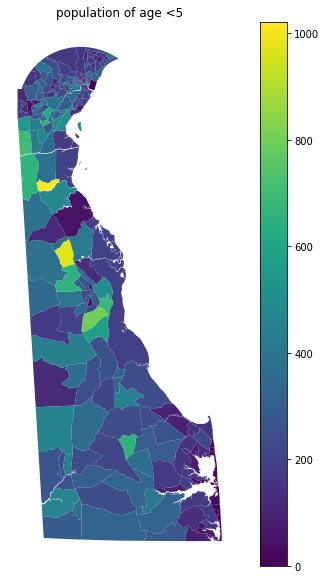

In [53]:
ax = gde2.plot(column="POP0C10", figsize=(10,10), legend=True)
ax.axis('off');
plt.title("population of age <5");


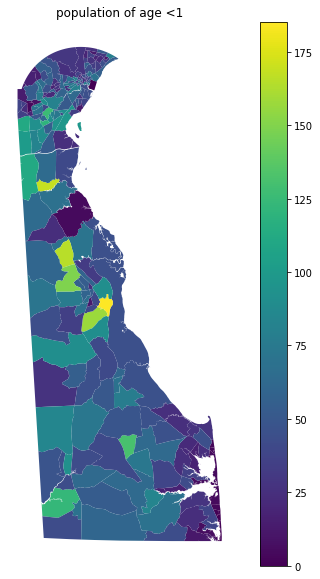

In [54]:
ax = gde2.plot(column="AGE0C10", figsize=(10,10), legend=True)
ax.axis('off');
plt.title("population of age <1");

In [55]:
for c in gde2.columns:
  print (c)

OBJECTID
GEOID10
NAME10
ID
NAME
STATE_NAME
ST_ABBREV
AREA
TOTPOP10
POPDENS10
MALES10
FEMALES10
HHPOP10
FAMPOP10
POPGRW0010
URBARPOP10
URBCLPOP10
RURALPOP10
POP0C10
POP5C10
POP10C10
POP15C10
POP20C10
POP25C10
POP30C10
POP35C10
POP40C10
POP45C10
POP50C10
POP55C10
POP60C10
POP65C10
POP70C10
POP75C10
POP80C10
POP85C10
ADULTS10
POP21UP10
MEDAGE10
MALE0C10
MALE5C10
MALE10C10
MALE15C10
MALE20C10
MALE25C10
MALE30C10
MALE35C10
MALE40C10
MALE45C10
MALE50C10
MALE55C10
MALE60C10
MALE65C10
MALE70C10
MALE75C10
MALE80C10
MALE85C10
MAL18UP10
MAL21UP10
MEDMAGE10
FEM0C10
FEM5C10
FEM10C10
FEM15C10
FEM20C10
FEM25C10
FEM30C10
FEM35C10
FEM40C10
FEM45C10
FEM50C10
FEM55C10
FEM60C10
FEM65C10
FEM70C10
FEM75C10
FEM80C10
FEM85C10
FEM18UP10
FEM21UP10
MEDFAGE10
AGE0C10
AGE1C10
AGE2C10
AGE3C10
AGE4C10
AGE5C10
AGE6C10
AGE7C10
AGE8C10
AGE9C10
AGE10C10
AGE11C10
AGE12C10
AGE13C10
AGE14C10
AGE15C10
AGE16C10
AGE17C10
AGE18C10
AGE19C10
AGE20C10
AGE21C10
MAGE0C10
MAGE1C10
MAGE2C10
MAGE3C10
MAGE4C10
MAGE5C10
MAGE6C10
MAGE7C1

In [56]:
gde2.head()

,OBJECTID,GEOID10,NAME10,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP10,POPDENS10,MALES10,FEMALES10,HHPOP10,FAMPOP10,POPGRW0010,URBARPOP10,URBCLPOP10,RURALPOP10,POP0C10,POP5C10,POP10C10,POP15C10,POP20C10,POP25C10,POP30C10,POP35C10,POP40C10,POP45C10,POP50C10,POP55C10,POP60C10,POP65C10,POP70C10,POP75C10,POP80C10,POP85C10,ADULTS10,POP21UP10,MEDAGE10,MALE0C10,...,MAGE21C10,FAGE0C10,FAGE1C10,FAGE2C10,FAGE3C10,FAGE4C10,FAGE5C10,FAGE6C10,FAGE7C10,FAGE8C10,FAGE9C10,FAGE10C10,FAGE11C10,FAGE12C10,FAGE13C10,FAGE14C10,FAGE15C10,FAGE16C10,FAGE17C10,FAGE18C10,FAGE19C10,FAGE20C10,FAGE21C10,MAGEBASE10,AGEBASE10,FAGEBASE10,TOTPOP00,HHPOP00,FAMPOP00,TOTHH00,FAMHH00,TOTHU00,OWNER00,RENTER00,STATE,COUNTY,TRACT,Shape__Are,Shape__Len,geometry
0,41952,10001043300,433,10001043300,100010433.00,Delaware,DE,3.110643,6131,2066.3,2634,3497,3754,2597,1.76,6131,0,0,252,234,186,1201,1542,362,213,212,189,261,249,197,163,133,135,145,156,301,5340,3709,23.9,120,...,173,22,26,32,32,20,24,30,23,23,22,15,24,15,19,14,13,20,19,290,396,344,246,2634,6131,3497,5150,3347,2415,1525,827,1615,700,825,10,001,043300,13447814.5,17305.108730,"POLYGON ((-8407912.000 4747633.000, -8407916.0..."
1,41953,10001043400,434,10001043400,100010434.00,Delaware,DE,25.487424,4146,162.4,1993,2153,4035,3394,2.41,663,1628,1855,254,265,275,245,198,211,219,218,251,307,242,286,316,243,213,141,116,146,3192,3070,43.7,129,...,18,12,21,39,26,27,30,23,23,23,32,25,31,34,28,17,27,24,28,25,15,22,16,1993,4146,2153,3267,3267,2770,1306,948,1369,928,378,10,001,043400,110610281.5,54451.560869,"POLYGON ((-8400566.000 4723609.000, -8400533.0..."
2,41954,10001040501,405.01,10001040501,100010405.01,Delaware,DE,4.018039,4923,1218.3,2357,2566,4923,3934,1.19,4809,0,114,335,370,334,327,354,336,279,280,331,376,320,300,256,240,199,154,89,43,3700,3499,37.3,185,...,44,24,31,36,32,27,37,44,42,44,28,37,31,35,34,38,28,34,29,41,31,27,31,2357,4923,2566,4372,4372,3533,1741,1197,1883,1293,448,10,001,040501,17441837.0,29816.205130,"POLYGON ((-8413661.000 4756406.000, -8413639.0..."
3,41955,10001043202,432.02,10001043202,100010432.02,Delaware,DE,120.936219,3790,33.2,1901,1889,3790,3007,0.08,207,248,3335,192,207,235,223,249,221,208,192,273,333,316,256,297,191,170,113,61,53,3012,2883,43.1,103,...,19,21,20,15,13,20,9,20,23,23,24,17,21,20,33,22,24,21,21,29,22,25,17,1901,3790,1889,3758,3758,3027,1512,1029,1804,1140,372,10,001,043202,508771036.5,380012.094923,"MULTIPOLYGON (((-8383737.000 4714003.000, -838..."
4,41956,10001040502,405.02,10001040502,100010405.02,Delaware,DE,11.535671,1981,175.0,939,1042,1981,1610,-6.42,708,0,1273,125,111,90,97,103,118,93,78,110,145,118,98,139,181,164,121,58,32,1589,1541,47.3,63,...,11,14,14,15,11,8,10,20,14,9,7,8,5,11,7,9,9,13,16,7,7,8,9,939,1981,1042,3846,3846,3077,1554,1033,1720,1013,541,10,001,040502,48896979.0,41289.833401,"POLYGON ((-8406730.000 4756939.000, -8406913.0..."


In [57]:
!ls "Licensed Child Care Providers and Facilities"

geo_export_46a9026c-660b-476b-b7f2-edaacf0c264b.dbf
geo_export_46a9026c-660b-476b-b7f2-edaacf0c264b.prj
geo_export_46a9026c-660b-476b-b7f2-edaacf0c264b.shp
geo_export_46a9026c-660b-476b-b7f2-edaacf0c264b.shx


In [58]:
childcareprov = gpd.GeoDataFrame.from_file("Licensed Child Care Providers and Facilities/geo_export_46a9026c-660b-476b-b7f2-edaacf0c264b.shp")
childcareprov

,age_range,capacity,count,delaware_s,enforcemen,financial_,intent_to_,phone_numb,resource_i,resource_n,resource_2,resource_t,site_city,site_close,site_count,site_opens,site_state,site_stree,site_zip_c,special_co,geometry
0,6 months through 5 years.,9.0,1.0,0,None,Child Care Food Program,None,(302) 856-2651,27390.0,LISA STOECKEL,"STOECKEL, LISA",Licensed Family Child Care,GEORGETOWN,5:00 PM,Sussex,7:30 AM,DE,22448 PETERKINS ROAD,19947,None,POINT (-75.32508 38.66056)
1,6 weeks through 5 years.,99.0,1.0,5,None,Child Care Food Program;Nonprofit;Purchase of ...,None,(302) 254-9622,27399.0,YMCA OF DELAWARE / CENTRAL BRANCH YMCA CHILDRE...,YMCA OF DELAWARE / CENTRAL BRANCH YMCA CHILDRE...,Licensed Child Care Center,WILMINGTON,6:00 PM,New Castle,6:45 AM,DE,501 WEST 11TH STREET,19801,None,POINT (-75.55141 39.74876)
2,1 year through 12 years.,59.0,1.0,0,None,Purchase of Care,None,(302) 883-3092,27407.0,DOVER EDUCATIONAL & COMMUNITY CENTER,DOVER EDUCATIONAL & COMMUNITY CENTER,Licensed Child Care Center,DOVER,8:00 PM,Kent,6:00 AM,DE,744 RIVER ROAD,19901,None,POINT (-75.51585 39.15254)
3,6 weeks through 12 years.,9.0,1.0,0,None,Child Care Food Program;Purchase of Care,None,(302) 287-5733,27410.0,ELIZABETH JOHNSON,"JOHNSON, ELIZABETH",Licensed Family Child Care,WILMINGTON,6:00 PM,New Castle,6:00 AM,DE,2011 WEST STREET,19802,None,POINT (-75.54265 39.75412)
4,6 weeks through 12 years.,9.0,1.0,0,None,Private,None,(302) 656-1344,27411.0,JANEL DEMONIA,"DEMONIA, JANEL",Licensed Family Child Care,WILMINGTON,11:00 PM,New Castle,3:00 PM,DE,1113 CADE STREET,19802,None,POINT (-75.53390 39.74288)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,6 weeks through .,12.0,1.0,2,None,Child Care Food Program;Purchase of Care,None,(302) 990-5263,1457041.0,PRECIOUS MEMORIES CHILDCARE,PRECIOUS MEMORIES CHILDCARE,Licensed Large Family Child Care,SEAFORD,5:00 PM,SUSSEX,7:00 AM,DE,425 E STEIN HWY.,19973,None,POINT (-75.61400 38.64709)
1058,6 weeks through 12 years.,206.0,1.0,0,None,Child Care Food Program;Purchase of Care,None,(302) 328-4000,1458667.0,HARVEST CHILD & YOUTH DEVELOPMENT CENTER - NEW...,HARVEST CHILD & YOUTH DEVELOPMENT CENTER - NEW...,Licensed Child Care Center,NEW CASTLE,6:00 PM,NEW CASTLE,6:00 AM,DE,901 EAST BASIN ROAD,19720,None,POINT (-75.58090 39.66512)
1059,1 year through 12 years.,108.0,1.0,0,None,Child Care Food Program;Purchase of Care,None,(302) 715-2040,1459651.0,SMARTY PANTS ACADEMY II,SMARTY PANTS ACADEMY II,Licensed Child Care Center,SMYRNA,6:00 PM,NEW CASTLE,6:30 AM,DE,5838 DUPONT PKWY,19977,None,POINT (-75.60959 39.30989)
1060,6 weeks through .,12.0,1.0,5,None,None,None,(302) 588-1281,1461796.0,TRESSA CLEMOW DBA LOVE BUG LANE LEARNING ACADE...,"CLEMOW DBA LOVE BUG LANE LEARNING ACADEMY, LLC...",Licensed Large Family Child Care,WILMINGTON,5:00 PM,NEW CASTLE,7:30 AM,DE,300A WYOMING AVENUE,19809,None,POINT (-75.48224 39.78825)


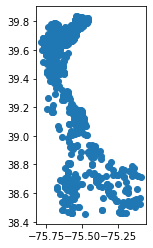

In [59]:
childcareprov.plot()

In [60]:
childcareprov = childcareprov.to_crs('EPSG:3857')
childcareprov.shape

(1062, 21)

Text(0.5, 1.0, 'population age <5 and childcare providers')

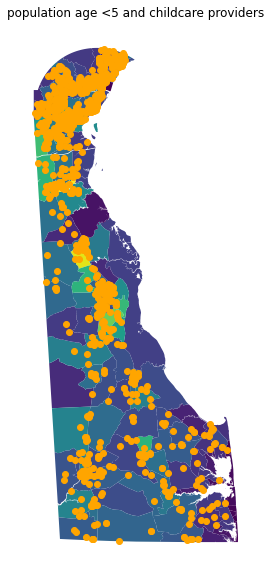

In [61]:
ax = gde2.plot(column="POP0C10", figsize=(10,10))
childcareprov.plot(ax=ax, c='orange')
ax.axis('off')
plt.title("population age <5 and childcare providers")

In [62]:
!ls

 aameetings_geo.csv
'AA Meetings List - Full List.csv'
'AA Meetings List - Full List_Revised (1).csv'
 DEBB2016.csv
 DEBB2018.csv
 DEBB.csv
 DEemergencyprovidermerged.csv
'DE emergency provider merged data 5.8.2020.xlsx'
'Delaware_Census_Tracts_2010-shp 2'
 DEPP2016.csv
 DEPP2018.csv
 DE_Tracts
 fwdisitpossibletopulldatafromarcgis_com
 fwdisitpossibletopulldatafromarcgis_com.zip
'Licensed Child Care Providers and Facilities'
 PUMA18_Tract.csv
 PUMA_Match.csv
 tl_2018_10_tract.cpg
 tl_2018_10_tract.dbf
 tl_2018_10_tract.prj
 tl_2018_10_tract.shp
 tl_2018_10_tract.shp.ea.iso.xml
 tl_2018_10_tract.shp.iso.xml
 tl_2018_10_tract.shx
 tl_2018_10_tract.zip
 tl_2018_10_tract.zip.1
 tl_2018_10_tract.zip.2
 tl_2018_10_tract.zip.3
 tl_2018_us_county.cpg
 tl_2018_us_county.dbf
 tl_2018_us_county.prj
 tl_2018_us_county.shp
 tl_2018_us_county.shp.ea.iso.xml
 tl_2018_us_county.shp.iso.xml
 tl_2018_us_county.shx
 tl_2018_us_county.zip


In [0]:
emchildcareprov = gpd.GeoDataFrame.from_file("fwdisitpossibletopulldatafromarcgis_com/emergencychildcare.shp")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb08135b7b8>, (561, 15))

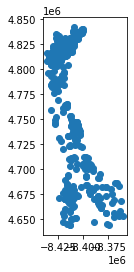

In [64]:
emchildcareprov.plot(), emchildcareprov.shape

Text(0.5, 1.0, 'population age <5 and open childcare providers')

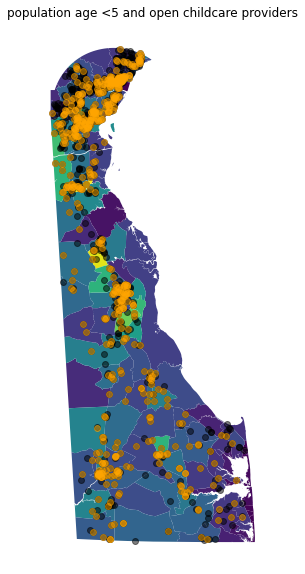

In [65]:
ax = gde2.plot(column="POP0C10", figsize=(10,10))
childcareprov.plot(ax=ax, c='k', alpha=0.5)
emchildcareprov.plot(ax=ax, c='orange', alpha=0.5)
ax.axis('off')
plt.title("population age <5 and open childcare providers")

In [66]:
!ls 


 aameetings_geo.csv
'AA Meetings List - Full List.csv'
'AA Meetings List - Full List_Revised (1).csv'
 DEBB2016.csv
 DEBB2018.csv
 DEBB.csv
 DEemergencyprovidermerged.csv
'DE emergency provider merged data 5.8.2020.xlsx'
'Delaware_Census_Tracts_2010-shp 2'
 DEPP2016.csv
 DEPP2018.csv
 DE_Tracts
 fwdisitpossibletopulldatafromarcgis_com
 fwdisitpossibletopulldatafromarcgis_com.zip
'Licensed Child Care Providers and Facilities'
 PUMA18_Tract.csv
 PUMA_Match.csv
 tl_2018_10_tract.cpg
 tl_2018_10_tract.dbf
 tl_2018_10_tract.prj
 tl_2018_10_tract.shp
 tl_2018_10_tract.shp.ea.iso.xml
 tl_2018_10_tract.shp.iso.xml
 tl_2018_10_tract.shx
 tl_2018_10_tract.zip
 tl_2018_10_tract.zip.1
 tl_2018_10_tract.zip.2
 tl_2018_10_tract.zip.3
 tl_2018_us_county.cpg
 tl_2018_us_county.dbf
 tl_2018_us_county.prj
 tl_2018_us_county.shp
 tl_2018_us_county.shp.ea.iso.xml
 tl_2018_us_county.shp.iso.xml
 tl_2018_us_county.shx
 tl_2018_us_county.zip


In [67]:
import shapely
from fiona.crs import from_epsg

openemchildcare = pd.read_csv("DEemergencyprovidermerged.csv")
openemchildcare['Long'] = pd.to_numeric(openemchildcare['Long'], errors='coerce')
openemchildcare['Lat'] = pd.to_numeric(openemchildcare['Lat'], errors='coerce')
openemchildcare['lonlat'] = list(zip(openemchildcare.Long, openemchildcare.Lat))
openemchildcare

# Create Point Geometry for based on lonlat column
openemchildcare['geometry'] = openemchildcare[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

openemchildcare = gpd.GeoDataFrame(openemchildcare)
openemchildcare.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 i
openemchildcare = openemchildcare.to_crs('EPSG:3857')
openemchildcare.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,LicenseNumber,County,Name,NameReversed,TypeofChildCare,EnforcementAction,IntenttoRevoke,StreetAddress,City,State,ZipCode,PhoneNumber,AgeRange,Capacity,OpeningTime,ClosingTime,SpecialConditions,GovernmentPrograms,DelawareSTARSLevel,Lat,Long,FID,USER_Name,USER_Conta,USER_Con_1,USER_Bus,USER_Count,USER_Phone,USER_Email,USER_Pro_1,USER_Hours,USER_Days,USER_Curre,USER_Cur_1,USER_Licen,Emergency,lonlat,geometry
0,27390,Sussex,LISA STOECKEL,"""STOECKEL, LISA""",Licensed Family Child Care,#NULL!,#NULL!,22448 PETERKINS ROAD,GEORGETOWN,DE,19947,(302) 856-2651,6 months through 5 years.,9,7:30 AM,5:00 PM,#NULL!,Child Care Food Program,0,38.660561,-75.325081,307,Lisa Stoeckel,Lisa,Stoeckel,"22448 Peterkins Road, Georgetown, DE 19947",Sussex,3028562651,lisa.stoeckel@mediacombb.net,home-based child care,7AM - 4:30 PM,M-F,6 months up to 4 years,no,6plus 3,1,"(-75.325081, 38.66056076)",POINT (-8385149.661 4673165.789)
1,27399,New Castle,YMCA OF DELAWARE / CENTRAL BRANCH YMCA CHILDRE...,YMCA OF DELAWARE / CENTRAL BRANCH YMCA CHILDRE...,Licensed Child Care Center,#NULL!,#NULL!,501 WEST 11TH STREET,WILMINGTON,DE,19801,(302) 254-9622,6 weeks through 5 years.,99,6:45 AM,6:00 PM,#NULL!,Child Care Food Program;Nonprofit;Purchase of ...,5,39.748761,-75.551413,68,Central YMCA - Children's Corner,Jackie,Anderson,"501 W 11th Street, Wilmington, DE 19801",New Castle,302-254-9622 ext 0171,jackieanderson@ymcade.org,child care center,7 AM - 6 PM,M-F,0-5,yes,99,1,"(-75.5514135, 39.748761)",POINT (-8410344.880 4829499.798)
2,27407,Kent,DOVER EDUCATIONAL & COMMUNITY CENTER,DOVER EDUCATIONAL & COMMUNITY CENTER,Licensed Child Care Center,#NULL!,#NULL!,744 RIVER ROAD,DOVER,DE,19901,(302) 883-3092,1 year through 12 years.,59,6:00 AM,8:00 PM,#NULL!,Purchase of Care,0,39.152538,-75.515855,336,Dover Educational & Community Center Inc,Juliette E.,Jones-Williams,"744 River Road Dover, DE 19901",Kent,3028833092,DECCDayCare@hotmail.com,child care center,6 AM -5:30 PM,M-F,1-12 years,yes,59,1,"(-75.5158545, 39.152538)",POINT (-8406386.470 4743544.945)
3,27410,New Castle,ELIZABETH JOHNSON,"""JOHNSON, ELIZABETH""",Licensed Family Child Care,#NULL!,#NULL!,2011 WEST STREET,WILMINGTON,DE,19802,(302) 287-5733,6 weeks through 12 years.,9,6:00 AM,6:00 PM,#NULL!,Child Care Food Program;Purchase of Care,0,39.754116,-75.542648,192,Elizabeth Johnson,Elizabeth,Johnson,2011 West Street Wilmington DE 19802,New Castle,302-287-5733,joy10001@aol.com,home-based child care,6:00 A.M - 6:00 P.M.,M-F,Birth - 12 years,yes,9,1,"(-75.5426475, 39.754116)",POINT (-8409369.053 4830275.157)
4,27415,New Castle,MARY RICHARDSON,"""RICHARDSON, MARY""",Licensed Family Child Care,#NULL!,#NULL!,120 HALCYON DRIVE,NEW CASTLE,DE,19720,(302) 654-7251,6 weeks through 12 years.,9,7:00 AM,7:00 PM,#NULL!,Child Care Food Program;Purchase of Care,0,39.700566,-75.557880,305,Mary Richardson,Mary,Richardson,"120 Halcyon Drive, New Castle, DE 19720",New Castle,3026547251,maryrichardson540@yahoo.com,home-based child care,7 AM - 5 PM,M-F,infants to four,no,9,1,"(-75.55788, 39.700566)",POINT (-8411064.727 4822524.279)


In [68]:
emchildcareprov.head()

,USER_Provi,USER_OCCL_,USER_Conta,USER_Con_1,USER_Busin,USER_Count,USER_Phone,USER_Email,USER_Pro_1,USER_Hours,USER_Days_,USER_Curre,USER_Cur_1,USER_Licen,geometry
0,Cradles to Crayons and Beyond Early Learning C...,1131350.0,Joy,Whye,"1415 Pulaski Highway Newark, DE 19702",New Castle,3025953370,Teasha32@gmail.com,child care center,6:30 AM - 6:00 PM,M-F,Infants - School Age,yes,132,POINT (-8424653.664 4811584.289)
1,Lynda Rocco (Teachable Moments),1190674.0,LYNDA,ROCCO,"634 FIREWOOD LN. New Castle, DE 19720",New Castle,8.5649560159e+19,lyndarocco02@gmail.com,home-based child care,7 AM -6 PM,M-F,6 months to 12 years old,yes,12,POINT (-8418888.873 4812987.884)
2,Barbara Bell,823339.0,Barbara,Bell,"231 kesselring ave, Dover, DE 19904",Kent,3022705637,bellbarbara39@yahoo.com,home-based child care,7 AM -11 PM,M-F,"9 months to 1 year,2 years old,3 years old,4 y...",yes,6 Plus 3,POINT (-8408177.322 4741149.930)
3,EUGENIA B. MUMFORD,489521.0,EUGENIA,MUMFORD,"27294 dogwood lane, Millsboro, DE 19966",Sussex,302-260-1369,E.MUMFORD@VERIZON.NET,home-based child care,5:30 AM - 10 PM,M-F,2 TO 12 YEARS OLD,yes,9,POINT (-8384545.085 4666450.177)
4,Tonia Hurtt,721964.0,Tonia,Hurtt,26 South Clements Street Smyrna DE 19977,Kent,3027476655,Thurtt1206@gmail.com,home-based child care,5:30 AM - 5:30 PM,M-F,6 years old and older/ school age,yes,9,POINT (-8417403.593 4763903.658)


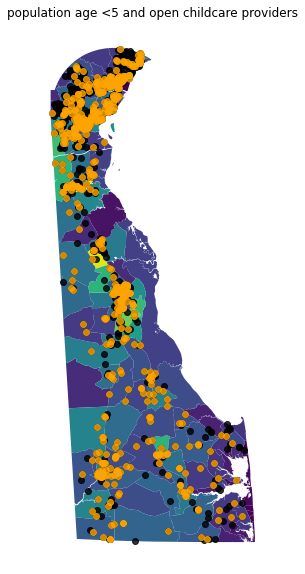

In [69]:
ax = gde2.plot(column="POP0C10", figsize=(10,10))
childcareprov.plot(ax=ax, c='k', alpha=0.8)
openemchildcare[openemchildcare["Emergency"] == 1].plot(ax=ax, c='orange', alpha=0.8)
ax.axis('off')
plt.title("population age <5 and open childcare providers");

In [70]:
gde2["PUMA"] = 0
gde2[gde2.COUNTY == "005"]["PUMA"] = 300

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
puma2tract = pd.read_csv("PUMA18_Tract.csv", header=None)
#puma2tract["Tract"] = puma2tract["Tract"].astype(str)
puma2tract = puma2tract.iloc[1:].rename({0:"NAME10", 1:"PUMA"}, axis=1)#["Tract"]

In [72]:
gde2.merge(puma2tract, on="NAME10", how="outer")

,OBJECTID,GEOID10,NAME10,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP10,POPDENS10,MALES10,FEMALES10,HHPOP10,FAMPOP10,POPGRW0010,URBARPOP10,URBCLPOP10,RURALPOP10,POP0C10,POP5C10,POP10C10,POP15C10,POP20C10,POP25C10,POP30C10,POP35C10,POP40C10,POP45C10,POP50C10,POP55C10,POP60C10,POP65C10,POP70C10,POP75C10,POP80C10,POP85C10,ADULTS10,POP21UP10,MEDAGE10,MALE0C10,...,FAGE1C10,FAGE2C10,FAGE3C10,FAGE4C10,FAGE5C10,FAGE6C10,FAGE7C10,FAGE8C10,FAGE9C10,FAGE10C10,FAGE11C10,FAGE12C10,FAGE13C10,FAGE14C10,FAGE15C10,FAGE16C10,FAGE17C10,FAGE18C10,FAGE19C10,FAGE20C10,FAGE21C10,MAGEBASE10,AGEBASE10,FAGEBASE10,TOTPOP00,HHPOP00,FAMPOP00,TOTHH00,FAMHH00,TOTHU00,OWNER00,RENTER00,STATE,COUNTY,TRACT,Shape__Are,Shape__Len,geometry,PUMA_x,PUMA_y
0,41952.0,10001043300,433,10001043300,100010433.00,Delaware,DE,3.110643,6131.0,2066.3,2634.0,3497.0,3754.0,2597.0,1.76,6131.0,0.0,0.0,252.0,234.0,186.0,1201.0,1542.0,362.0,213.0,212.0,189.0,261.0,249.0,197.0,163.0,133.0,135.0,145.0,156.0,301.0,5340.0,3709.0,23.9,120.0,...,26.0,32.0,32.0,20.0,24.0,30.0,23.0,23.0,22.0,15.0,24.0,15.0,19.0,14.0,13.0,20.0,19.0,290.0,396.0,344.0,246.0,2634.0,6131.0,3497.0,5150.0,3347.0,2415.0,1525.0,827.0,1615.0,700.0,825.0,10,001,043300,13447814.5,17305.108730,"POLYGON ((-8407912.000 4747633.000, -8407916.0...",0.0,NaN
1,41953.0,10001043400,434,10001043400,100010434.00,Delaware,DE,25.487424,4146.0,162.4,1993.0,2153.0,4035.0,3394.0,2.41,663.0,1628.0,1855.0,254.0,265.0,275.0,245.0,198.0,211.0,219.0,218.0,251.0,307.0,242.0,286.0,316.0,243.0,213.0,141.0,116.0,146.0,3192.0,3070.0,43.7,129.0,...,21.0,39.0,26.0,27.0,30.0,23.0,23.0,23.0,32.0,25.0,31.0,34.0,28.0,17.0,27.0,24.0,28.0,25.0,15.0,22.0,16.0,1993.0,4146.0,2153.0,3267.0,3267.0,2770.0,1306.0,948.0,1369.0,928.0,378.0,10,001,043400,110610281.5,54451.560869,"POLYGON ((-8400566.000 4723609.000, -8400533.0...",0.0,NaN
2,41954.0,10001040501,405.01,10001040501,100010405.01,Delaware,DE,4.018039,4923.0,1218.3,2357.0,2566.0,4923.0,3934.0,1.19,4809.0,0.0,114.0,335.0,370.0,334.0,327.0,354.0,336.0,279.0,280.0,331.0,376.0,320.0,300.0,256.0,240.0,199.0,154.0,89.0,43.0,3700.0,3499.0,37.3,185.0,...,31.0,36.0,32.0,27.0,37.0,44.0,42.0,44.0,28.0,37.0,31.0,35.0,34.0,38.0,28.0,34.0,29.0,41.0,31.0,27.0,31.0,2357.0,4923.0,2566.0,4372.0,4372.0,3533.0,1741.0,1197.0,1883.0,1293.0,448.0,10,001,040501,17441837.0,29816.205130,"POLYGON ((-8413661.000 4756406.000, -8413639.0...",0.0,NaN
3,41955.0,10001043202,432.02,10001043202,100010432.02,Delaware,DE,120.936219,3790.0,33.2,1901.0,1889.0,3790.0,3007.0,0.08,207.0,248.0,3335.0,192.0,207.0,235.0,223.0,249.0,221.0,208.0,192.0,273.0,333.0,316.0,256.0,297.0,191.0,170.0,113.0,61.0,53.0,3012.0,2883.0,43.1,103.0,...,20.0,15.0,13.0,20.0,9.0,20.0,23.0,23.0,24.0,17.0,21.0,20.0,33.0,22.0,24.0,21.0,21.0,29.0,22.0,25.0,17.0,1901.0,3790.0,1889.0,3758.0,3758.0,3027.0,1512.0,1029.0,1804.0,1140.0,372.0,10,001,043202,508771036.5,380012.094923,"MULTIPOLYGON (((-8383737.000 4714003.000, -838...",0.0,NaN
4,41956.0,10001040502,405.02,10001040502,100010405.02,Delaware,DE,11.535671,1981.0,175.0,939.0,1042.0,1981.0,1610.0,-6.42,708.0,0.0,1273.0,125.0,111.0,90.0,97.0,103.0,118.0,93.0,78.0,110.0,145.0,118.0,98.0,139.0,181.0,164.0,121.0,58.0,32.0,1589.0,1541.0,47.3,63.0,...,14.0,15.0,11.0,8.0,10.0,20.0,14.0,9.0,7.0,8.0,5.0,11.0,7.0,9.0,9.0,13.0,16.0,7.0,7.0,8.0,9.0,939.0,1981.0,1042.0,3846.0,3846.0,3077.0,1554.0,1033.0,1720.0,1013.0,541.0,10,001,040502,48896979.0,41289.833401,"POLYGON ((-8406730.000 4756939.000, -8406913.0...",0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,NaN,NaN,122.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [73]:
gde2.NAME10.sort_values(), puma2tract.NAME10

(41     101.01
 65     101.04
 40        102
 38        103
 37        104
         ...  
 128       519
 156      6.01
 155      6.02
 154         9
 53       9801
 Name: NAME10, Length: 215, dtype: object, 1           2
 2           3
 3           4
 4           5
 5        6.01
         ...  
 117    168.01
 118    168.04
 119    169.01
 120    169.04
 121      9901
 Name: NAME10, Length: 121, dtype: object)

In [74]:
gde2.head()

,OBJECTID,GEOID10,NAME10,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP10,POPDENS10,MALES10,FEMALES10,HHPOP10,FAMPOP10,POPGRW0010,URBARPOP10,URBCLPOP10,RURALPOP10,POP0C10,POP5C10,POP10C10,POP15C10,POP20C10,POP25C10,POP30C10,POP35C10,POP40C10,POP45C10,POP50C10,POP55C10,POP60C10,POP65C10,POP70C10,POP75C10,POP80C10,POP85C10,ADULTS10,POP21UP10,MEDAGE10,MALE0C10,...,FAGE0C10,FAGE1C10,FAGE2C10,FAGE3C10,FAGE4C10,FAGE5C10,FAGE6C10,FAGE7C10,FAGE8C10,FAGE9C10,FAGE10C10,FAGE11C10,FAGE12C10,FAGE13C10,FAGE14C10,FAGE15C10,FAGE16C10,FAGE17C10,FAGE18C10,FAGE19C10,FAGE20C10,FAGE21C10,MAGEBASE10,AGEBASE10,FAGEBASE10,TOTPOP00,HHPOP00,FAMPOP00,TOTHH00,FAMHH00,TOTHU00,OWNER00,RENTER00,STATE,COUNTY,TRACT,Shape__Are,Shape__Len,geometry,PUMA
0,41952,10001043300,433,10001043300,100010433.00,Delaware,DE,3.110643,6131,2066.3,2634,3497,3754,2597,1.76,6131,0,0,252,234,186,1201,1542,362,213,212,189,261,249,197,163,133,135,145,156,301,5340,3709,23.9,120,...,22,26,32,32,20,24,30,23,23,22,15,24,15,19,14,13,20,19,290,396,344,246,2634,6131,3497,5150,3347,2415,1525,827,1615,700,825,10,001,043300,13447814.5,17305.108730,"POLYGON ((-8407912.000 4747633.000, -8407916.0...",0
1,41953,10001043400,434,10001043400,100010434.00,Delaware,DE,25.487424,4146,162.4,1993,2153,4035,3394,2.41,663,1628,1855,254,265,275,245,198,211,219,218,251,307,242,286,316,243,213,141,116,146,3192,3070,43.7,129,...,12,21,39,26,27,30,23,23,23,32,25,31,34,28,17,27,24,28,25,15,22,16,1993,4146,2153,3267,3267,2770,1306,948,1369,928,378,10,001,043400,110610281.5,54451.560869,"POLYGON ((-8400566.000 4723609.000, -8400533.0...",0
2,41954,10001040501,405.01,10001040501,100010405.01,Delaware,DE,4.018039,4923,1218.3,2357,2566,4923,3934,1.19,4809,0,114,335,370,334,327,354,336,279,280,331,376,320,300,256,240,199,154,89,43,3700,3499,37.3,185,...,24,31,36,32,27,37,44,42,44,28,37,31,35,34,38,28,34,29,41,31,27,31,2357,4923,2566,4372,4372,3533,1741,1197,1883,1293,448,10,001,040501,17441837.0,29816.205130,"POLYGON ((-8413661.000 4756406.000, -8413639.0...",0
3,41955,10001043202,432.02,10001043202,100010432.02,Delaware,DE,120.936219,3790,33.2,1901,1889,3790,3007,0.08,207,248,3335,192,207,235,223,249,221,208,192,273,333,316,256,297,191,170,113,61,53,3012,2883,43.1,103,...,21,20,15,13,20,9,20,23,23,24,17,21,20,33,22,24,21,21,29,22,25,17,1901,3790,1889,3758,3758,3027,1512,1029,1804,1140,372,10,001,043202,508771036.5,380012.094923,"MULTIPOLYGON (((-8383737.000 4714003.000, -838...",0
4,41956,10001040502,405.02,10001040502,100010405.02,Delaware,DE,11.535671,1981,175.0,939,1042,1981,1610,-6.42,708,0,1273,125,111,90,97,103,118,93,78,110,145,118,98,139,181,164,121,58,32,1589,1541,47.3,63,...,14,14,15,11,8,10,20,14,9,7,8,5,11,7,9,9,13,16,7,7,8,9,939,1981,1042,3846,3846,3077,1554,1033,1720,1013,541,10,001,040502,48896979.0,41289.833401,"POLYGON ((-8406730.000 4756939.000, -8406913.0...",0


In [0]:
aa = pd.read_csv("AA Meetings List - Full List.csv")
aa1 = aa[:49]#.head()
#aa.tail()

In [76]:
aa1.rename({"Unnamed: 1":	"Location", "Location":"Lat",	"Lat":"Lng", "Lng":"Open/Closed", "Open/Closed":"Unnamed: 5"	}, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
aa1.head()

,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20
0,Serenity at Sunrise,St Thomas Episcopal Church,39.6750647,-75.7540381,Open,NaN,NaN,NaN
1,Pioneer Group,St. Andrew's Church,39.743626,-75.5502779,Closed,NaN,NaN,NaN
2,Dawn Patrol,Westminster House - First Presbyterian Church,39.6864156,-75.7633581,Closed,NaN,NaN,NaN
3,Early Risers,Trinity Episcopal Parish,39.7501291,-75.5549173,Closed,NaN,NaN,NaN
4,Sunrise,Twelve and Twelve Club,39.757614,-75.5368136,Open,NaN,NaN,NaN


In [78]:
aa1.tail()

,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20
44,Today,Church of Good Shepherd,39.8040876,-75.5200828,NaN,NaN,NaN,NaN
45,Red Lion Breakfast Location Temporarily Closed,Red Lion United Methodist Church,39.6080455,-75.6683456,NaN,NaN,NaN,NaN
46,Chadds Ford Big Book,St Cornelius Church,39.8645829,-75.5598043,NaN,NaN,NaN,NaN
47,Vet's Location Temporarily Closed,VA Hospital,39.7402104,-75.6087265,NaN,NaN,NaN,NaN
48,Chichester Step Location Temporarily Closed,Linwood United Methodist Church,39.8271721,-75.4288142,NaN,NaN,NaN,NaN


In [79]:
aa1['Lat'] = aa1.Lat.astype(float)

aa1['Lng'] = aa1.Lng.astype(float)
#aa = aa.dropna()
aa1['lonlat'] = list(zip(aa1.Lng, aa1.Lat))

# Create Point Geometry for based on lonlat column
aa1['geometry'] = aa1[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

aa1 = gpd.GeoDataFrame(aa1)
aa1.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 i
aa1 = aa1.to_crs('EPSG:3857')
aa1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry
0,Serenity at Sunrise,St Thomas Episcopal Church,39.675065,-75.754038,Open,NaN,NaN,NaN,"(-75.7540381, 39.6750647)",POINT (-8432900.947 4818835.310)
1,Pioneer Group,St. Andrew's Church,39.743626,-75.550278,Closed,NaN,NaN,NaN,"(-75.5502779, 39.743626)",POINT (-8410218.465 4828756.350)
2,Dawn Patrol,Westminster House - First Presbyterian Church,39.686416,-75.763358,Closed,NaN,NaN,NaN,"(-75.7633581, 39.6864156)",POINT (-8433938.444 4820477.141)
3,Early Risers,Trinity Episcopal Parish,39.750129,-75.554917,Closed,NaN,NaN,NaN,"(-75.5549173, 39.7501291)",POINT (-8410734.921 4829697.882)
4,Sunrise,Twelve and Twelve Club,39.757614,-75.536814,Open,NaN,NaN,NaN,"(-75.5368136, 39.757614)",POINT (-8408719.626 4830781.671)


In [80]:
aa1.tail()

,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry
44,Today,Church of Good Shepherd,39.804088,-75.520083,NaN,NaN,NaN,NaN,"(-75.5200828, 39.8040876)",POINT (-8406857.162 4837513.532)
45,Red Lion Breakfast Location Temporarily Closed,Red Lion United Methodist Church,39.608046,-75.668346,NaN,NaN,NaN,NaN,"(-75.6683456, 39.6080455)",POINT (-8423361.701 4809146.930)
46,Chadds Ford Big Book,St Cornelius Church,39.864583,-75.559804,NaN,NaN,NaN,NaN,"(-75.5598043, 39.8645829)",POINT (-8411278.939 4846283.305)
47,Vet's Location Temporarily Closed,VA Hospital,39.740210,-75.608727,NaN,NaN,NaN,NaN,"(-75.6087265, 39.7402104)",POINT (-8416724.934 4828261.869)
48,Chichester Step Location Temporarily Closed,Linwood United Methodist Church,39.827172,-75.428814,NaN,NaN,NaN,NaN,"(-75.4288142, 39.8271721)",POINT (-8396697.188 4840859.092)


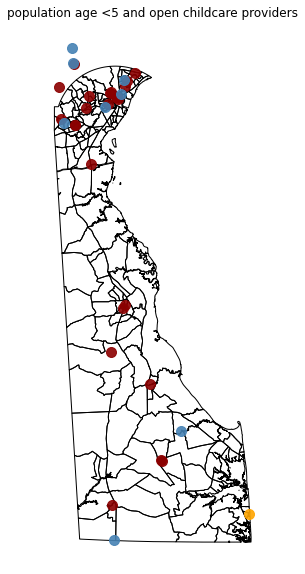

In [81]:
ax = gde2.plot(figsize=(10,10), color="None", edgecolor='k')
xlim = plt.xlim()
aa1[aa1['Open/Closed'] == "Closed"].plot(ax=ax, c='DarkRed', alpha=0.9, markersize=100)
aa1[aa1['Open/Closed'] == "Open"].plot(ax=ax, c='SteelBlue', alpha=0.9, markersize=100)
aa1[aa1['Open/Closed'] == "Online"].plot(ax=ax, c='orange', alpha=0.9, markersize=100)
ax.axis('off')
plt.xlim(xlim)
plt.title("population age <5 and open childcare providers");

In [0]:
aa2 = aa[49:]

In [83]:
aa2

,Meeting Name,Unnamed: 1,Location,Lat,Lng,Open/Closed,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20
49,Smyrna A.A. Location Temporarily Closed,Smyrna Church of Christ,1630 Rd 487,Smyrna,NaN,NaN,NaN,NaN
50,Vent-A-Lators Men Location Temporarily Closed,St Marks United Methodist Church,1700 Limestone Rd,Stanton,NaN,NaN,NaN,NaN
51,Price's Run,Haven United Methodist Church,1709 W 3rd St,Wilmington,NaN,NaN,NaN,NaN
52,"Gay, Joyous and Free Online Meeting",All Saints' Episcopal Church,18 Olive Ave,Rehoboth,NaN,NaN,NaN,NaN
53,Concord Step Solution Location Temporarily Closed,Alternating Step and Big Book,1800 Fairfax Blvd,N. Wilmington,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
173,Wilmington,Grace United Methodist Church,900 Washington St,Wilmington,NaN,NaN,NaN,NaN
174,Today Group Location Temporarily Closed,Grange Hall,911 S Governors Ave,Dover,NaN,NaN,NaN,NaN
175,Displaced Park Place Location Temporarily Closed,Newark Day Care,921 Barksdale Rd,Newark,NaN,NaN,NaN,NaN
176,First Stop Friday Location Temporarily Closed,Tower Hill School,W 19th St,Wilmington,NaN,NaN,NaN,NaN


In [84]:
!pip install geopy
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter 

locator = Nominatim(user_agent='myGeocoder')
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.5)
aa2["Location"] = aa2["Location"] + ",DE"
aa2["Location"] = aa2["Location"].apply(geocode)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [85]:
aa2.loc[aa2.index[0], "Location"][1]

(38.761063, -108.0599184)

In [0]:
coords = []
for c in aa2.index:
  try:
    coords.append(aa2.loc[c, "Location"][1] )
  except:
    coords.append((np.nan, np.nan))

In [87]:
import shapely
aa2["coords"] = coords
aa2['lonlat'] = aa2["coords"].apply(lambda x: (x[1],x[0]))
aa2 = gpd.GeoDataFrame(aa2)
aa2['geometry'] = aa2[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
aa2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Meeting Name,Unnamed: 1,Location,Lat,Lng,Open/Closed,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,coords,lonlat,geometry
49,Smyrna A.A. Location Temporarily Closed,Smyrna Church of Christ,"(1630 Road, North Delta, Delta, Delta County, ...",Smyrna,NaN,NaN,NaN,NaN,"(38.761063, -108.0599184)","(-108.0599184, 38.761063)",POINT (-108.060 38.761)
50,Vent-A-Lators Men Location Temporarily Closed,St Marks United Methodist Church,"(Limestone Road, Kaolin, New Garden Township, ...",Stanton,NaN,NaN,NaN,NaN,"(39.791949, -75.726209)","(-75.726209, 39.791949)",POINT (-75.726 39.792)
51,Price's Run,Haven United Methodist Church,"(1709, West 3rd Street, Hilltop, Wawaset Park,...",Wilmington,NaN,NaN,NaN,NaN,"(39.74735108172472, -75.57005670839806)","(-75.57005670839806, 39.74735108172472)",POINT (-75.570 39.747)
52,"Gay, Joyous and Free Online Meeting",All Saints' Episcopal Church,"(18, Olive Avenue, Rehoboth Beach, Sussex Coun...",Rehoboth,NaN,NaN,NaN,NaN,"(38.718931972633776, -75.0778953841942)","(-75.0778953841942, 38.718931972633776)",POINT (-75.078 38.719)
53,Concord Step Solution Location Temporarily Closed,Alternating Step and Big Book,"(Fairfax Boulevard, Cloutier Court, Bellewood,...",N. Wilmington,NaN,NaN,NaN,NaN,"(39.7900962, -75.5338657)","(-75.5338657, 39.7900962)",POINT (-75.534 39.790)
...,...,...,...,...,...,...,...,...,...,...,...
173,Wilmington,Grace United Methodist Church,"(Stonum, Washington Street, Washington Park, N...",Wilmington,NaN,NaN,NaN,NaN,"(39.6603655, -75.5765066907859)","(-75.5765066907859, 39.6603655)",POINT (-75.577 39.660)
174,Today Group Location Temporarily Closed,Grange Hall,"(911, South Governors Avenue, Morris Estates, ...",Dover,NaN,NaN,NaN,NaN,"(39.14422052311653, -75.5253121093818)","(-75.5253121093818, 39.14422052311653)",POINT (-75.525 39.144)
175,Displaced Park Place Location Temporarily Closed,Newark Day Care,"(921, Barksdale Road, Oakland, Newark, New Cas...",Newark,NaN,NaN,NaN,NaN,"(39.67876825215415, -75.7703535204824)","(-75.7703535204824, 39.67876825215415)",POINT (-75.770 39.679)
176,First Stop Friday Location Temporarily Closed,Tower Hill School,"(West 19th Street, Highlands, Wawaset Park, Wi...",Wilmington,NaN,NaN,NaN,NaN,"(39.7640921, -75.5720149)","(-75.5720149, 39.7640921)",POINT (-75.572 39.764)


In [88]:
aa2.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 i
aa2 = aa2.to_crs('EPSG:3857')
aa2.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Meeting Name,Unnamed: 1,Location,Lat,Lng,Open/Closed,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,coords,lonlat,geometry
49,Smyrna A.A. Location Temporarily Closed,Smyrna Church of Christ,"(1630 Road, North Delta, Delta, Delta County, ...",Smyrna,NaN,NaN,NaN,NaN,"(38.761063, -108.0599184)","(-108.0599184, 38.761063)",POINT (-12029175.091 4687503.459)
50,Vent-A-Lators Men Location Temporarily Closed,St Marks United Methodist Church,"(Limestone Road, Kaolin, New Garden Township, ...",Stanton,NaN,NaN,NaN,NaN,"(39.791949, -75.726209)","(-75.726209, 39.791949)",POINT (-8429803.026 4835754.775)
51,Price's Run,Haven United Methodist Church,"(1709, West 3rd Street, Hilltop, Wawaset Park,...",Wilmington,NaN,NaN,NaN,NaN,"(39.74735108172472, -75.57005670839806)","(-75.57005670839806, 39.74735108172472)",POINT (-8412420.232 4829295.664)
52,"Gay, Joyous and Free Online Meeting",All Saints' Episcopal Church,"(18, Olive Avenue, Rehoboth Beach, Sussex Coun...",Rehoboth,NaN,NaN,NaN,NaN,"(38.718931972633776, -75.0778953841942)","(-75.0778953841942, 38.718931972633776)",POINT (-8357633.084 4681490.584)
53,Concord Step Solution Location Temporarily Closed,Alternating Step and Big Book,"(Fairfax Boulevard, Cloutier Court, Bellewood,...",N. Wilmington,NaN,NaN,NaN,NaN,"(39.7900962, -75.5338657)","(-75.5338657, 39.7900962)",POINT (-8408391.467 4835486.351)


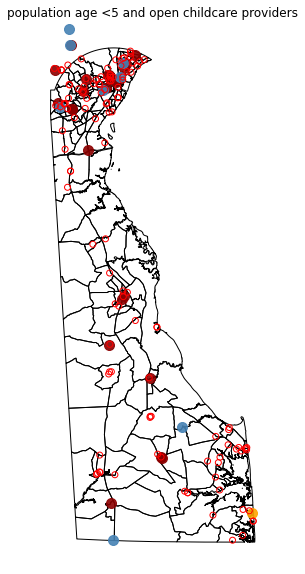

In [89]:

ax = gde2.plot(figsize=(10,10), color="None", edgecolor='k')
xlim = plt.xlim()
ylim = plt.ylim()
aa1[aa1['Open/Closed'] == "Closed"].plot(ax=ax, c='DarkRed', alpha=0.9, markersize=100)
aa1[aa1['Open/Closed'] == "Open"].plot(ax=ax, c='SteelBlue', alpha=0.9, markersize=100)
aa1[aa1['Open/Closed'] == "Online"].plot(ax=ax, c='orange', alpha=0.9, markersize=100)
aa2.plot(color="None", ec="r",ax=ax)
ax.axis('off')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title("population age <5 and open childcare providers");


In [0]:
pd.concat([aa1, aa2]).to_csv('aameetings_geo.csv')

In [112]:
aa3 = pd.read_csv ("AA Meetings List - Full List_Revised (1).csv")
aa3 = gpd.GeoDataFrame(aa3)
aa3.head()

,Unnamed: 0,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry,Unnamed: 1,coords
0,0,Serenity at Sunrise,St Thomas Episcopal Church,39.6750647,-75.754038,Open,NaN,NaN,NaN,"(-75.7540381, 39.6750647)",POINT (-8432900.946826246 4818835.310175917),NaN,NaN
1,1,Pioneer Group,St. Andrew's Church,39.743626,-75.550278,Closed,NaN,NaN,NaN,"(-75.5502779, 39.743626)",POINT (-8410218.465118309 4828756.35027566),NaN,NaN
2,2,Dawn Patrol,Westminster House - First Presbyterian Church,39.6864156,-75.763358,Closed,NaN,NaN,NaN,"(-75.7633581, 39.6864156)",POINT (-8433938.444480438 4820477.141057509),NaN,NaN
3,3,Early Risers,Trinity Episcopal Parish,39.7501291,-75.554917,Closed,NaN,NaN,NaN,"(-75.5549173, 39.7501291)",POINT (-8410734.920763897 4829697.881995613),NaN,NaN
4,4,Sunrise,Twelve and Twelve Club,39.757614,-75.536814,Open,NaN,NaN,NaN,"(-75.5368136, 39.757614)",POINT (-8408719.626098422 4830781.670693408),NaN,NaN


In [113]:
aa3[(aa3.Lng > 75) * (aa3.Lng <76)]["Lng"] = - aa3[(aa3.Lng > 75) * (aa3.Lng <76)]["Lng"]
aa3.coords = [(float(aa3.loc[ind, "coords"].split(',')[1].replace('(','').replace(')','')), 
  float(aa3.loc[ind, "coords"].split(',')[0].replace('(','').replace(')',''))) 
if not isinstance(aa3.loc[ind, "coords"], float) 
else (float(aa3.loc[ind, "Lng"]), 
      float(aa3.loc[ind, "Lat"])) for ind in aa3.index  ]


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
aa3['lonlat'] = aa3["coords"].apply(lambda x: (x[0],x[1]))
aa3['geometry'] = aa3[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
aa3

,Unnamed: 0,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry,Unnamed: 1,coords
0,0,Serenity at Sunrise,St Thomas Episcopal Church,39.6750647,-75.754038,Open,NaN,NaN,NaN,"(-75.754038, 39.6750647)",POINT (-75.754 39.675),NaN,"(-75.754038, 39.6750647)"
1,1,Pioneer Group,St. Andrew's Church,39.743626,-75.550278,Closed,NaN,NaN,NaN,"(-75.550278, 39.743626)",POINT (-75.550 39.744),NaN,"(-75.550278, 39.743626)"
2,2,Dawn Patrol,Westminster House - First Presbyterian Church,39.6864156,-75.763358,Closed,NaN,NaN,NaN,"(-75.763358, 39.6864156)",POINT (-75.763 39.686),NaN,"(-75.763358, 39.6864156)"
3,3,Early Risers,Trinity Episcopal Parish,39.7501291,-75.554917,Closed,NaN,NaN,NaN,"(-75.554917, 39.7501291)",POINT (-75.555 39.750),NaN,"(-75.554917, 39.7501291)"
4,4,Sunrise,Twelve and Twelve Club,39.757614,-75.536814,Open,NaN,NaN,NaN,"(-75.536814, 39.757614)",POINT (-75.537 39.758),NaN,"(-75.536814, 39.757614)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,173,Wilmington,"Stonum, Washington Street, Washington Park, Ne...",Wilmington,NaN,Open,NaN,NaN,NaN,"(-75.5765066907859, 39.6603655)",POINT (-75.577 39.660),Grace United Methodist Church,"(-75.5765066907859, 39.6603655)"
169,174,Today Group Location Temporarily Closed,"911, South Governors Avenue, Morris Estates, D...",Dover,NaN,Closed,NaN,NaN,NaN,"(-75.5253121093818, 39.14422052311653)",POINT (-75.525 39.144),Grange Hall,"(-75.5253121093818, 39.14422052311653)"
170,175,Displaced Park Place Location Temporarily Closed,"921, Barksdale Road, Oakland, Newark, New Cast...",Newark,NaN,Closed,NaN,NaN,NaN,"(-75.7703535204824, 39.67876825215415)",POINT (-75.770 39.679),Newark Day Care,"(-75.7703535204824, 39.67876825215415)"
171,176,First Stop Friday Location Temporarily Closed,"West 19th Street, Highlands, Wawaset Park, Wil...",Wilmington,NaN,Closed,NaN,NaN,NaN,"(-75.5720149, 39.7640921)",POINT (-75.572 39.764),Tower Hill School,"(-75.5720149, 39.7640921)"


In [115]:
aa3.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 i
aa3 = aa3.to_crs('EPSG:3857')
aa3.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry,Unnamed: 1,coords
0,0,Serenity at Sunrise,St Thomas Episcopal Church,39.6750647,-75.754038,Open,NaN,NaN,NaN,"(-75.754038, 39.6750647)",POINT (-8432900.936 4818835.310),NaN,"(-75.754038, 39.6750647)"
1,1,Pioneer Group,St. Andrew's Church,39.743626,-75.550278,Closed,NaN,NaN,NaN,"(-75.550278, 39.743626)",POINT (-8410218.476 4828756.350),NaN,"(-75.550278, 39.743626)"
2,2,Dawn Patrol,Westminster House - First Presbyterian Church,39.6864156,-75.763358,Closed,NaN,NaN,NaN,"(-75.763358, 39.6864156)",POINT (-8433938.433 4820477.141),NaN,"(-75.763358, 39.6864156)"
3,3,Early Risers,Trinity Episcopal Parish,39.7501291,-75.554917,Closed,NaN,NaN,NaN,"(-75.554917, 39.7501291)",POINT (-8410734.887 4829697.882),NaN,"(-75.554917, 39.7501291)"
4,4,Sunrise,Twelve and Twelve Club,39.757614,-75.536814,Open,NaN,NaN,NaN,"(-75.536814, 39.757614)",POINT (-8408719.671 4830781.671),NaN,"(-75.536814, 39.757614)"


In [116]:
aa3.tail()

,Unnamed: 0,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry,Unnamed: 1,coords
168,173,Wilmington,"Stonum, Washington Street, Washington Park, Ne...",Wilmington,NaN,Open,NaN,NaN,NaN,"(-75.5765066907859, 39.6603655)",POINT (-8413138.241 4816709.571),Grace United Methodist Church,"(-75.5765066907859, 39.6603655)"
169,174,Today Group Location Temporarily Closed,"911, South Governors Avenue, Morris Estates, D...",Dover,NaN,Closed,NaN,NaN,NaN,"(-75.5253121093818, 39.14422052311653)",POINT (-8407439.286 4742351.030),Grange Hall,"(-75.5253121093818, 39.14422052311653)"
170,175,Displaced Park Place Location Temporarily Closed,"921, Barksdale Road, Oakland, Newark, New Cast...",Newark,NaN,Closed,NaN,NaN,NaN,"(-75.7703535204824, 39.67876825215415)",POINT (-8434717.171 4819370.974),Newark Day Care,"(-75.7703535204824, 39.67876825215415)"
171,176,First Stop Friday Location Temporarily Closed,"West 19th Street, Highlands, Wawaset Park, Wil...",Wilmington,NaN,Closed,NaN,NaN,NaN,"(-75.5720149, 39.7640921)",POINT (-8412638.217 4831719.773),Tower Hill School,"(-75.5720149, 39.7640921)"
172,177,Millsboro Monday Night,NaN,Millsboro,NaN,Open,NaN,NaN,NaN,"(nan, nan)",POINT (nan nan),Saint Marks Church,"(nan, nan)"


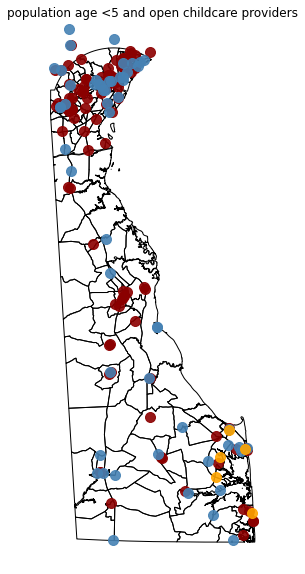

In [117]:

ax = gde2.plot(figsize=(10,10), color="None", edgecolor='k')
xlim = plt.xlim()
ylim = plt.ylim()
aa3[aa3['Open/Closed'] == "Closed"].plot(ax=ax, c='DarkRed', alpha=0.9, markersize=100)
aa3[aa3['Open/Closed'] == "Open"].plot(ax=ax, c='SteelBlue', alpha=0.9, markersize=100)
aa3[aa3['Open/Closed'] == "Online"].plot(ax=ax, c='orange', alpha=0.9, markersize=100)
ax.axis('off')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title("population age <5 and open childcare providers");


In [127]:
tt = np.array([t[0] for t in aa3.coords.values])
aa3[(tt>-74) + (tt<-77) + 
    np.isnan(tt)].to_csv("problemchildren.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [128]:
aa3[(tt>-74) + (tt<-77) + 
    np.isnan(tt)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Meeting Name,Location,Lat,Lng,Open/Closed,Unnamed: 5,Unnamed: 6,*Data collected from ndiaa.org/meetings on 5/8/20,lonlat,geometry,Unnamed: 1,coords
15,15,Fenwick Island Beginners Online Meeting,St. Matthews ByThe-Sea UMC,39.0318742,75.78911,Online,NaN,NaN,NaN,"(75.78910970000001, 39.0318742)",POINT (8436805.099 4726238.307),NaN,"(75.78910970000001, 39.0318742)"
49,49,Smyrna A.A. Location Temporarily Closed,"1630 Road, North Delta, Delta, Delta County, C...",Smyrna,NaN,Closed,NaN,NaN,NaN,"(-108.0599184, 38.761063)",POINT (-12029175.091 4687503.459),Smyrna Church of Christ,"(-108.0599184, 38.761063)"
85,86,Solution for Living,"Cameron Road, Niederkr√ºchten, Kreis Viersen, ...","North East, MD",NaN,Open,NaN,NaN,NaN,"(6.1331248, 51.2077902)",POINT (682736.330 6658132.036),Bethel Lutheran Church,"(6.1331248, 51.2077902)"
101,102,SOS Ladies Women,"300, Guernsey Road, Guernsey, Adams County, Pe...",West Grove,NaN,Open,NaN,NaN,NaN,"(-77.23246095909401, 39.947084901426905)",POINT (-8597478.227 4858255.778),West Grove United Methodist Church,"(-77.23246095909401, 39.947084901426905)"
113,114,Suspended: Big Book Study Location Temporarily...,"Road 289, Osborn, Towns County, Georgia, Unite...",Lewes,NaN,Closed,NaN,NaN,NaN,"(-83.679562, 34.911897)",POINT (-9315166.232 4151914.735),Conley's United Methodist Church,"(-83.679562, 34.911897)"
115,116,Clarksville Men's Closed Discussion Men,NaN,Clarksville/Frankford,NaN,Open,NaN,NaN,NaN,"(nan, nan)",POINT (nan nan),Blackwater Fellowship Church,"(nan, nan)"
161,165,Thursday/Sunday Group,"RD 4, Sch√∂neweide, Nuthe-Urstromtal, Teltow-F...",Camden,NaN,Open,NaN,NaN,NaN,"(13.2881782, 52.140453)",POINT (1479233.231 6825561.108),Simpson Center/Whatcoat church,"(13.2881782, 52.140453)"
172,177,Millsboro Monday Night,NaN,Millsboro,NaN,Open,NaN,NaN,NaN,"(nan, nan)",POINT (nan nan),Saint Marks Church,"(nan, nan)"
